<a href="https://colab.research.google.com/github/beyzoskaya/ClassificationCIFAR10/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader

In [14]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.flatten(x))
])

In [15]:
cifar10_full = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=transform)

Files already downloaded and verified


In [16]:
total_size = len(cifar10_full)
total_size

50000

In [17]:
class_indices = [[] for _ in range(10)]
for i, (image,label) in enumerate(cifar10_full):
  class_indices[label].append(i)

In [18]:
from torch.utils.data import Subset
import random

train_size_per_class = 600
val_size_per_class = 200
test_size_per_class = 200

train_indices = []
val_indices = []
test_indices = []

for indices in class_indices:
  random.shuffle(indices)
  train_indices.extend(indices[:train_size_per_class])
  val_indices.extend(indices[train_size_per_class:train_size_per_class + val_size_per_class])
  test_indices.extend(indices[train_size_per_class + val_size_per_class:train_size_per_class + val_size_per_class + test_size_per_class])

cifar10_train = Subset(cifar10_full, train_indices)
cifar10_val = Subset(cifar10_full, val_indices)
cifar10_test = Subset(cifar10_full, test_indices)

In [19]:
len(cifar10_train), len(cifar10_val), len(cifar10_test)

(6000, 2000, 2000)

In [24]:
from collections import Counter
def count_images_per_class(dataset):
  return Counter(sample[1] for sample in dataset)

images_per_class_train = count_images_per_class(cifar10_train)
images_per_class_val = count_images_per_class(cifar10_val)
images_per_class_test = count_images_per_class(cifar10_test)

print("Number of images per class in the train set:")
for class_label, count in images_per_class_train.items():
    print(f"Class {class_label}: {count} images")

print("\nNumber of images per class in the validation set:")
for class_label, count in images_per_class_val.items():
    print(f"Class {class_label}: {count} images")

print("\nNumber of images per class in the test set:")
for class_label, count in images_per_class_test.items():
    print(f"Class {class_label}: {count} images")

Number of images per class in the train set:
Class 0: 600 images
Class 1: 600 images
Class 2: 600 images
Class 3: 600 images
Class 4: 600 images
Class 5: 600 images
Class 6: 600 images
Class 7: 600 images
Class 8: 600 images
Class 9: 600 images

Number of images per class in the validation set:
Class 0: 200 images
Class 1: 200 images
Class 2: 200 images
Class 3: 200 images
Class 4: 200 images
Class 5: 200 images
Class 6: 200 images
Class 7: 200 images
Class 8: 200 images
Class 9: 200 images

Number of images per class in the test set:
Class 0: 200 images
Class 1: 200 images
Class 2: 200 images
Class 3: 200 images
Class 4: 200 images
Class 5: 200 images
Class 6: 200 images
Class 7: 200 images
Class 8: 200 images
Class 9: 200 images


In [20]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    random_indices = np.random.choice(len(dataset), num_images, replace=False)

    for i, idx in enumerate(random_indices):
        image, label = dataset[idx]


        image = image.view(3, 32, 32).numpy()
        image = np.transpose(image, (1, 2, 0))

        image = (image - image.min()) / (image.max() - image.min())

        axes[i].imshow(image)
        axes[i].set_title(f"Class: {label}")
        axes[i].axis('off')

    plt.show()


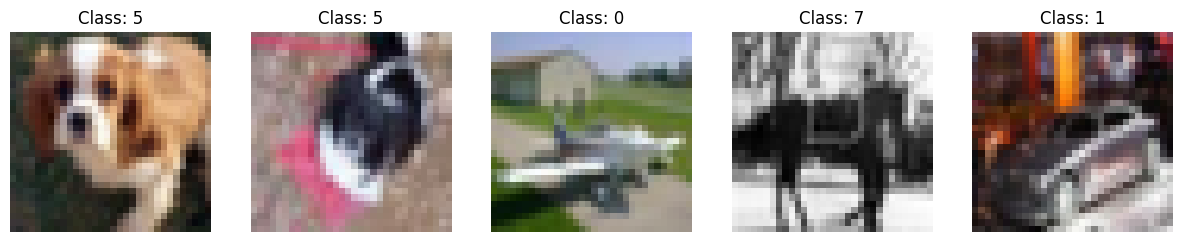

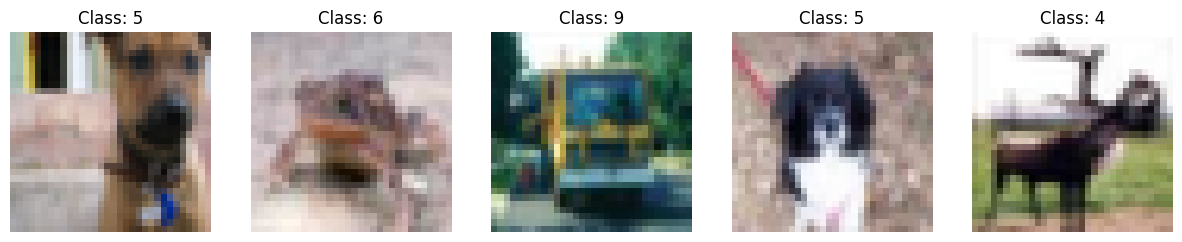

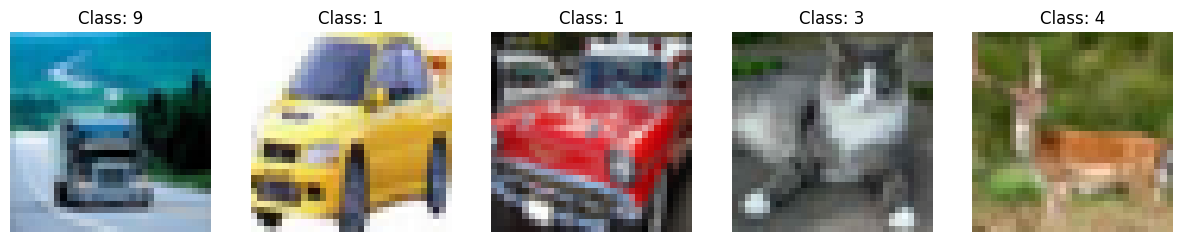

In [21]:
show_images(cifar10_train)
show_images(cifar10_val)
show_images(cifar10_test)

In [22]:
class_names = cifar10_full.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [26]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [27]:
def dataset_to_numpy(dataset):
    X, y = [], []
    for image, label in dataset:
        X.append(image.numpy())
        y.append(label)
    return np.array(X), np.array(y)

In [28]:
X_train, y_train = dataset_to_numpy(cifar10_train)
X_val, y_val = dataset_to_numpy(cifar10_val)
X_test, y_test = dataset_to_numpy(cifar10_test)

In [29]:
print("Datatype of X_train:", X_train.dtype)
print("Datatype of y_train:", y_train.dtype)
print("Datatype of X_val:", X_val.dtype)
print("Datatype of y_val:", y_val.dtype)
print("Datatype of X_test:", X_test.dtype)
print("Datatype of y_test:", y_test.dtype)

Datatype of X_train: float32
Datatype of y_train: int64
Datatype of X_val: float32
Datatype of y_val: int64
Datatype of X_test: float32
Datatype of y_test: int64


In [37]:
tree_classifier = DecisionTreeClassifier(max_depth=15)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [38]:
y_pred_val = tree_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Validation Accuracy: 0.24


In [39]:
y_pred_test = tree_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 0.22


Tried for Random Forest for comparison

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_val = forest_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
y_pred_test = forest_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Random Forest Validation Accuracy: {val_accuracy:.2f}")
print(f"Random Forest Test Accuracy: {test_accuracy:.2f}")


Random Forest Validation Accuracy: 0.39
Random Forest Test Accuracy: 0.38


Tried with PCA implementation of Decision Tree

In [42]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

n_components = 50

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

tree_classifier = DecisionTreeClassifier(max_depth=15)
tree_classifier.fit(X_train_pca, y_train)

y_pred_val = tree_classifier.predict(X_val_pca)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy after PCA: {val_accuracy:.2f}')

y_pred_test = tree_classifier.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy after PCA: {test_accuracy:.2f}')


Validation Accuracy after PCA: 0.24
Test Accuracy after PCA: 0.24
